# Portfolio Assignment 2 –Introduction to Cultural Data Science

## Part 1
Load  the 'divorce_margarine'dataset  from  the 'dslabs'package.  
Investigate  the  correlation between  margarine  consumption  and  divorce  rates  in  Maine.  


In [1]:
# instaling packages
install.packages('dplyr')
install.packages('ggplot2')
install.packages('dslabs')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)



In [2]:
# loading the libraries
library(dplyr)
library(ggplot2)
library(dslabs)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Loading the dataset
data("divorce_margarine")

# Always starting of by looking at what data we are dealing with
head(divorce_margarine)
str(divorce_margarine)

,divorce_rate_maine,margarine_consumption_per_capita,year
,<dbl>,<dbl>,<int>
1,5.0,8.2,2000
2,4.7,7.0,2001
3,4.6,6.5,2002
4,4.4,5.3,2003
5,4.3,5.2,2004
6,4.1,4.0,2005


'data.frame':	10 obs. of  3 variables:
 $ divorce_rate_maine              : num  5 4.7 4.6 4.4 4.3 4.1 4.2 4.2 4.2 4.1
 $ margarine_consumption_per_capita: num  8.2 7 6.5 5.3 5.2 4 4.6 4.5 4.2 3.7
 $ year                            : int  2000 2001 2002 2003 2004 2005 2006 2007 2008 2009


In [4]:
# Looking at the correlation between margarine consumption and divorce rates in Maine.
cor.test(divorce_margarine$margarine_consumption_per_capita, divorce_margarine$divorce_rate_maine)



	Pearson's product-moment correlation

data:  divorce_margarine$margarine_consumption_per_capita and divorce_margarine$divorce_rate_maine
t = 23.055, df = 8, p-value = 1.33e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9676666 0.9983038
sample estimates:
      cor 
0.9925585 


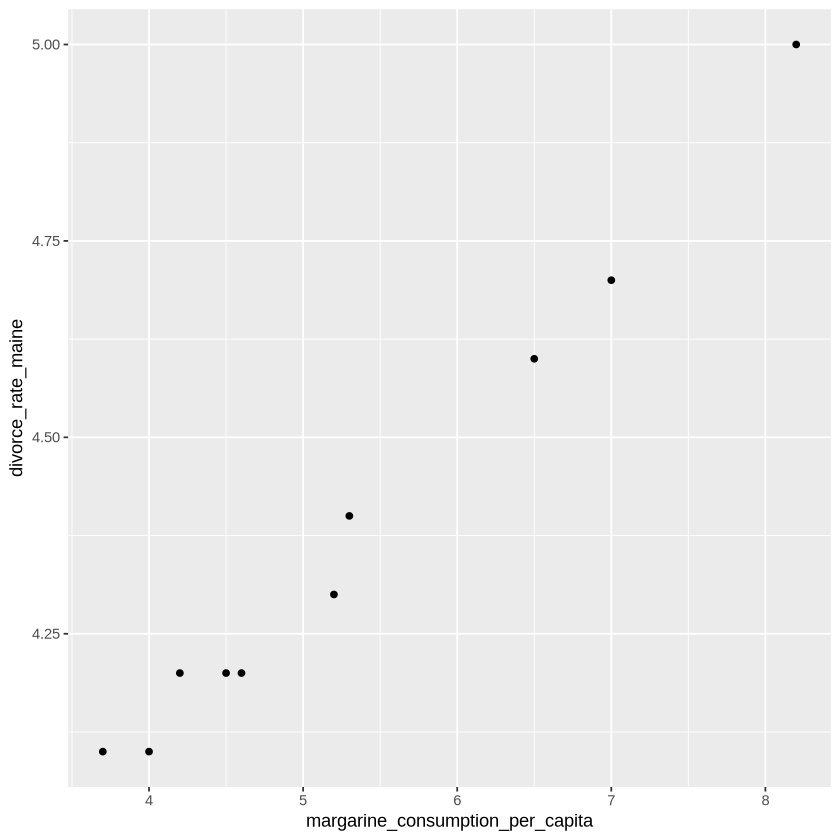

In [5]:
# We can see there is a strong and positive correlation = 0.99.
# We plot the data to visualize it

ggplot(divorce_margarine,
        aes(x = margarine_consumption_per_capita,
            y = divorce_rate_maine )) +
    geom_point()


Would  an  increase  in  the preference for margarine lead to skyrocketing divorce rates?

In [6]:
# The data shows strong correlation between the two varibales.
# We see that by the outcome (divorce rates) being dependent on the predictor (margarine consumption) 
# However, we have not been looking at the cause for this - and can't say if the margarine would lead to divorce rates.

## Part 2
Load the ‘GSSvocab’dataset from the ‘car’package. 
This dataset contains people’s scores on an Englishvocabulary test and includes demographic information.


In [7]:
install.packages('car')

Installing package into ‘/usr/local/spark-3.5.3-bin-hadoop3/R/lib’
(as ‘lib’ is unspecified)

also installing the dependencies ‘backports’, ‘cowplot’, ‘Deriv’, ‘modelr’, ‘microbenchmark’, ‘broom’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘survival’, ‘boot’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘nnet’, ‘pbkrtest’, ‘quantreg’, ‘lme4’




In [8]:
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [9]:
data(GSSvocab) # loading the data

In [10]:
# Exploring the data through structure and head
str(GSSvocab) 
head(GSSvocab)

'data.frame':	28867 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...


,year,gender,nativeBorn,ageGroup,educGroup,vocab,age,educ
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1978.1,1978,female,yes,50-59,12 yrs,10,52,12
1978.2,1978,female,yes,60+,<12 yrs,6,74,9
1978.3,1978,male,yes,30-39,<12 yrs,4,35,10
1978.4,1978,female,yes,50-59,12 yrs,9,50,12
1978.5,1978,female,yes,40-49,12 yrs,6,41,12
1978.6,1978,male,yes,18-29,12 yrs,6,19,12


Filter for the year 1978 and remove rows with missing values (the function na.exclude()is one way to do this–check out the documentation!).

In [11]:
# Creating a dataframe with the data from the year 1987, and using %>% to use functions together and removing rows

data1978 <- GSSvocab %>%
    filter(year == 1978) %>%
    na.exclude(data1978)

str(data1978) # we see that the numbers of observations is reduced = the filtering and remowing has worked

'data.frame':	1477 obs. of  8 variables:
 $ year      : Factor w/ 20 levels "1978","1982",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ gender    : Factor w/ 2 levels "female","male": 1 1 2 1 1 2 2 2 1 2 ...
 $ nativeBorn: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ ageGroup  : Factor w/ 5 levels "18-29","30-39",..: 4 5 2 4 3 1 1 4 3 1 ...
 $ educGroup : Factor w/ 5 levels "<12 yrs","12 yrs",..: 2 1 1 2 2 2 2 2 4 2 ...
 $ vocab     : num  10 6 4 9 6 6 4 7 8 3 ...
 $ age       : num  52 74 35 50 41 19 19 59 49 21 ...
 $ educ      : num  12 9 10 12 12 12 12 12 16 12 ...
 - attr(*, "na.action")= 'exclude' Named int [1:55] 179 193 258 329 346 389 390 408 429 451 ...
  ..- attr(*, "names")= chr [1:55] "1978.179" "1978.193" "1978.258" "1978.329" ...


Is a person’s  score on the vocabulary test  (‘vocab’)significantly impacted by their level  of education (‘educ’)? Visualize the relationship in aplot and build a model. Briefly explain theresults.




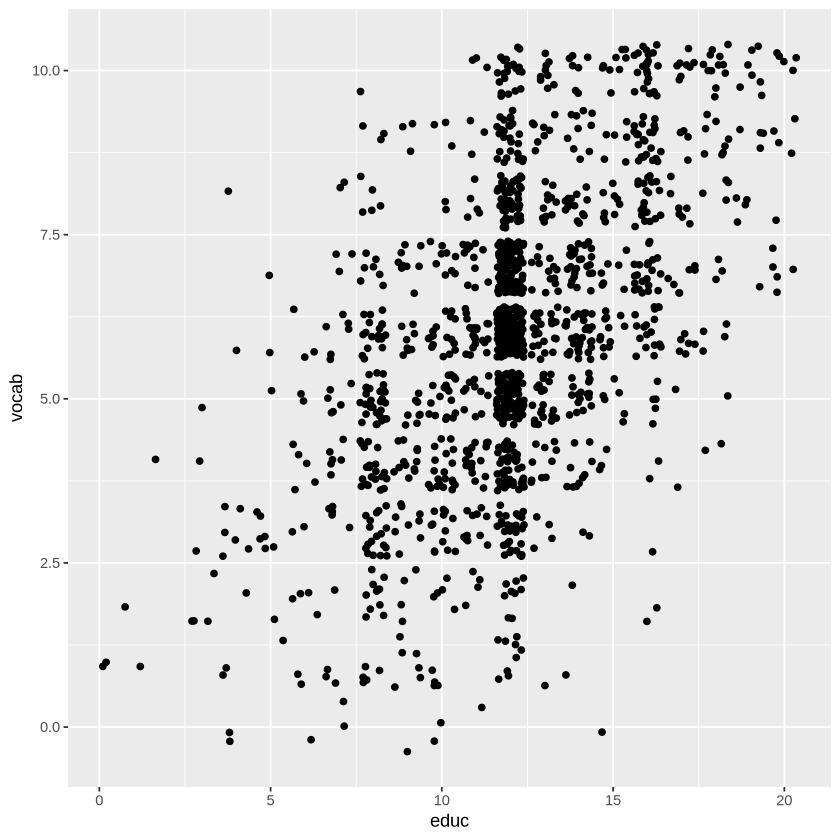

In [12]:
# Visualizing the relationship in a geom point plot
# We make the jitter in case they overlap

ggplot(data1978,
        aes(x = educ,
            y = vocab)) +
    geom_point(position = 'jitter')

In [13]:
# Creating a model 
vocab_model <- lm(vocab ~ educ, data1978)
summary(vocab_model)


Call:
lm(formula = vocab ~ educ, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1233 -1.1608  0.0542  1.0917  5.6243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.23567    0.19957   6.192  7.7e-10 ***
educ         0.39251    0.01606  24.443  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.885 on 1475 degrees of freedom
Multiple R-squared:  0.2883,	Adjusted R-squared:  0.2878 
F-statistic: 597.5 on 1 and 1475 DF,  p-value: < 2.2e-16


In [14]:
# We see we have a good p-value, which makes the relation statisctically significant.
# This is also underlined by the strong correlation we see from the multiple R-squared value = 0.288,
# making the correaltion positive as well, since there is an increase in x associated with increase in y.
# Lastly, we can say that 28,8% of the variance in the outcome can be explained by the predictor variable. 

Whether a person is thenative of an English-speaking country(‘nativeBorn’) could potentially have an impact on the size of their vocabulary. Visualize the relationship and add the predictor to the model. Briefly explain theresults.



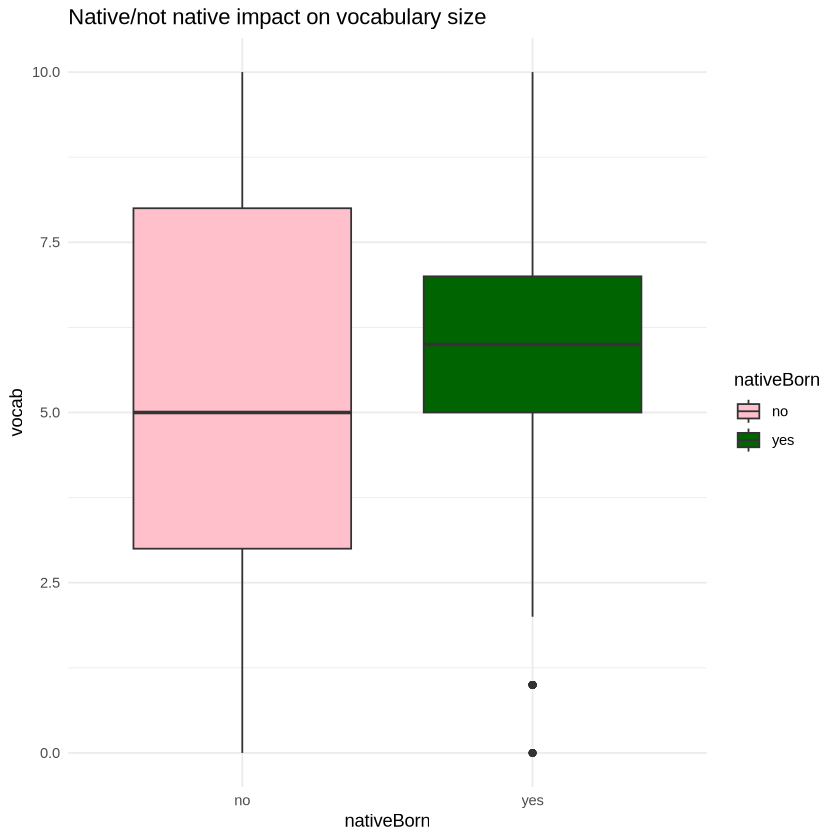

In [15]:
# visualising the relation between native born and size of vocabulary

ggplot(data1978, 
       aes(x = nativeBorn,
           y = vocab,
          fill = nativeBorn)) +
    geom_boxplot() +
    scale_fill_manual(values = c("pink", "darkgreen")) +
    labs(title = "Native/not native impact on vocabulary size",
         x = "nativeBorn",
         y = "vocab") +
    theme_minimal()


In [16]:
# This result indicates that native borns generally have a bigger vocabulary.
# There is a bigger varians in the people not native born, but the median is larger with the native borns

In [33]:
# Add the "nativeBorn" predictor to the model to see if this variable creates any changes the first vocab model
vocab_model2 <- lm(vocab ~ educ + nativeBorn, data1978)
summary(vocab_model2)


Call:
lm(formula = vocab ~ educ + nativeBorn, data = data1978)

Residuals:
   Min     1Q Median     3Q    Max 
-7.162 -1.200  0.015  1.231  5.803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.62803    0.27651   2.271  0.02327 *  
educ           0.39222    0.01601  24.499  < 2e-16 ***
nativeBornyes  0.65032    0.20551   3.164  0.00159 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.879 on 1474 degrees of freedom
Multiple R-squared:  0.2931,	Adjusted R-squared:  0.2921 
F-statistic: 305.6 on 2 and 1474 DF,  p-value: < 2.2e-16


Does  a  person’s  level  of  education  depend  on  whether they  are  a  native  of  the  country? Visualize the relationship. 

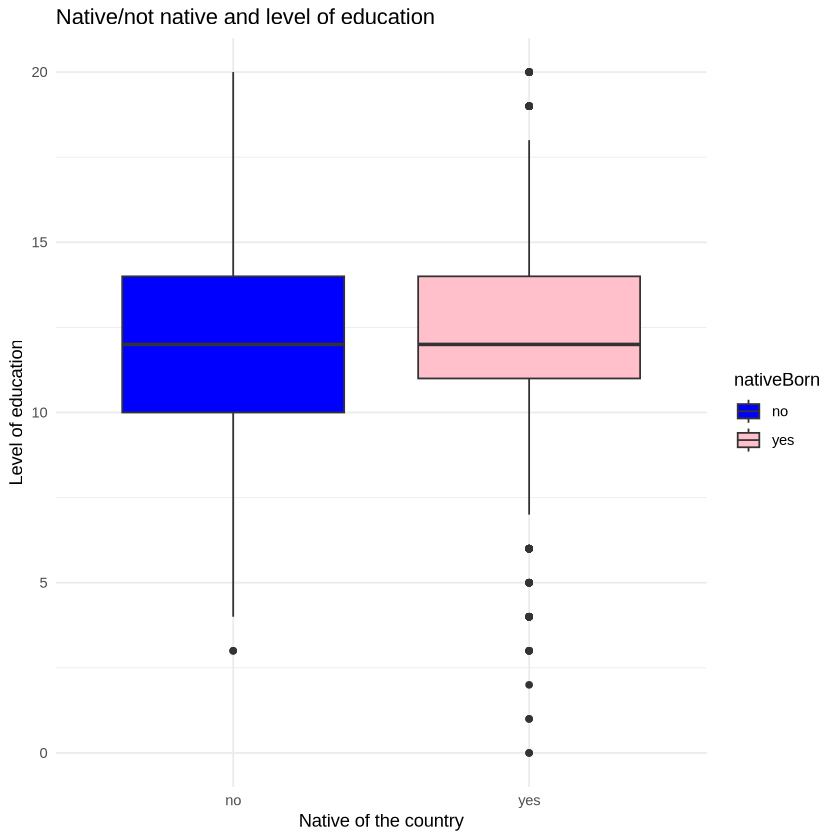

In [28]:
# Making a boxplot to see if level of education depend on whether you are native born or not
ggplot(data1978, 
       aes(x = nativeBorn,
           y = educ,
          fill = nativeBorn)) +
    geom_boxplot() +
    scale_fill_manual(values = c("blue", "pink")) +
    labs(title = "Native/not native and level of education",
         x = "Native of the country",
         y = "Level of education") +
    theme_minimal()


Do you think it makes sense to add the relationship as an interactionterm? Try creating the model and briefly explain the results. 

In [31]:
# The more predictors added, the more factors is represented to explain the outcome. 
# Therefore I would think, that adding the relationsship as an interactionterm would make sense.

# Creating the model
vocab_model3 <- lm(vocab ~ nativeBorn * educ, data1978)
summary(vocab_model3)


Call:
lm(formula = vocab ~ nativeBorn * educ, data = data1978)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1554 -1.2049  0.0149  1.2347  5.9857 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.35394    0.68780   0.515    0.607    
nativeBornyes       0.95000    0.71855   1.322    0.186    
educ                0.41510    0.05496   7.553 7.45e-14 ***
nativeBornyes:educ -0.02501    0.05745  -0.435    0.663    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 1473 degrees of freedom
Multiple R-squared:  0.2932,	Adjusted R-squared:  0.2917 
F-statistic: 203.7 on 3 and 1473 DF,  p-value: < 2.2e-16


In [40]:
# The intercept (0.35) represents the baseline vocabulary score for non-native individuals with zero years of education
# The coefficient for nativeBornyes (0.95) indicates the difference in vocabulary score for native-born individuals 
# compared to non-natives, but only when education (educ) is zero
# = a person with zero years of education is exprected to score 0.95.
# Furthermore, we see that educ = 0.415, meaning every time education increases 1 year the score increases 0.41

# Lastly, this means we do not have strong evidence that being native-born alone significantly affects vocabulary scores
# without considering educatioe, seen in the p-values:
# The p-value for education is good and highly significant (p < 0.001)
# The p-value for "nativeBornyes" is not significant (p = 0.186)

Which model performs best? When creating plots, try to play around with the options of ggplot2–add titlesand axis labels, and consider using colours.

In [42]:
# Comparing the different models
anova(vocab_model, vocab_model2, vocab_model3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1475,5241.828,NA,NA,NA,NA
2,1474,5206.458,1,35.3707012,10.0082911,0.001590199
3,1473,5205.788,1,0.6695224,0.1894442,0.663443355


In [41]:
# Model 2 has a p-value = 0.0001 which tells us it is a good model, and has a better model fit than model 1.
# Model 3 has a p-value = 0.6634 telling us it is not as good as model 2.

# This means model 2 performs the best.